In [66]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
#Extract Data
train_data = pd.read_csv('ridgetrain.txt', sep='  ',names=['input','output'],header=None)
test_data = pd.read_csv('ridgetest.txt',sep='  ',names=['input','output'],header=None)
print(train_data.shape)
print(type(train_data))
# print(test_data)/

(250, 2)
<class 'pandas.core.frame.DataFrame'>


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10920\3310313451.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv('ridgetrain.txt', sep='  ',names=['input','output'],header=None)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10920\3310313451.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data = pd.read_csv('ridgetest.txt',sep='  ',names=['input','output'],header=None)


In [68]:
train_x = np.array(train_data['input'])
train_y = np.array(train_data['output'])
test_x = np.array(test_data['input'])
test_y = np.array(test_data['output'])
print(type(train_x))

<class 'numpy.ndarray'>


In [69]:
def rbf_kernel(xn, xm, gamma):
    """
    Compute the Radial Basis Function (RBF) kernel between two vectors.

    Args:
        xn : First vector.
        xm : Second vector.
        gamma: Bandwidth parameter for the RBF kernel.
    """
    distance = np.linalg.norm(xn - xm)
    return np.exp(-gamma * (distance ** 2))

In [70]:
# Compute Landmarks from training_data
def compute_landmarks(train_x,num_landmarks):
    landmarks_values = np.random.choice(train_x, num_landmarks, replace=False)
    return landmarks_values

In [71]:
# Find Phi_value of each train_input
def compute_new_feature(train_x,landmarks):
    feature_vector = []
    for x_value in train_x:
        phi_x_value = []
        for landmark in landmarks:
            k_value = rbf_kernel(x_value,landmark,0.1)
            phi_x_value.append(k_value)
        feature_vector.append(phi_x_value)
    return feature_vector

In [72]:
num_landmarks = 20
landmarks = compute_landmarks(train_x,num_landmarks)
train_feature_matrix = np.array(compute_new_feature(train_x,landmarks))
print(train_feature_matrix)

[[1.55452623e-02 5.12400884e-02 8.30520999e-01 ... 2.54116476e-04
  2.96443475e-01 2.93833469e-04]
 [3.57682948e-01 1.70149606e-01 1.02470979e-03 ... 9.69004704e-01
  2.21529655e-02 9.59709795e-01]
 [5.83972343e-08 7.01486952e-07 2.22408622e-03 ... 3.14168116e-11
  5.11820924e-05 4.02865271e-11]
 ...
 [4.27539892e-08 5.26100661e-07 1.84033806e-03 ... 2.15833658e-11
  4.02418989e-05 2.77302691e-11]
 [9.08529777e-10 1.48088623e-08 1.63109401e-04 ... 2.18355043e-13
  1.96529777e-06 2.86923010e-13]
 [4.72546281e-05 3.15810182e-04 9.15386149e-02 ... 1.19530410e-07
  7.30162116e-03 1.46252894e-07]]


In [73]:
# Computing Weight Vector
def compute_weight_vector(feature_matrix,train_y,lambda_value):
    x_transpose = np.transpose(feature_matrix)
    xT_x = np.dot(x_transpose,feature_matrix)
    xT_y = np.dot(x_transpose,train_y)
    xT_x_plus_lambda_I = xT_x + lambda_value*np.eye(xT_x.shape[0])
    xT_x_plus_lambda_I_inv = np.linalg.inv(xT_x_plus_lambda_I)
    weight_matrix = np.dot(xT_x_plus_lambda_I_inv,xT_y)
    return weight_matrix

In [74]:
# Compute predicted_y
def landmark_ridge_prediction(weight_matrix,test_x):
    predicted_y_values = []
    for test_x_value in test_x:
        test_x_transpose = np.transpose(test_x_value)
        predicted_y = np.dot(test_x_transpose,weight_matrix)
        predicted_y_values.append(predicted_y)
    return predicted_y_values


In [75]:
# Calculate RMSE Scores
def calculate_rmse(true_values, predicted_values):
    n = len(true_values)
    rmse = np.sqrt(np.sum((true_values - predicted_values)**2) / n)
    return rmse

In [76]:
lambda_value = 0.1

# Computing Weight Matrix
weight_matrix = compute_weight_vector(train_feature_matrix,train_y,lambda_value)
# print(weight_matrix.shape)

# Computing new feature vector for test_x data
test_x_landmarks = np.array(compute_new_feature(test_x,landmarks))
# print(test_x_landmarks.shape)

# Landmark basedr Ridge Prediction
landmark_predicted_y = np.array(landmark_ridge_prediction(weight_matrix,test_x_landmarks))
# print(landmark_predicted_y.shape)

# Computing RMSE
rmse_score = calculate_rmse(test_y,landmark_predicted_y)
print("RMSE_Score with Lambda {} = {}".format(lambda_value,rmse_score))

RMSE_Score with Lambda 0.1 = 0.4393485903763684


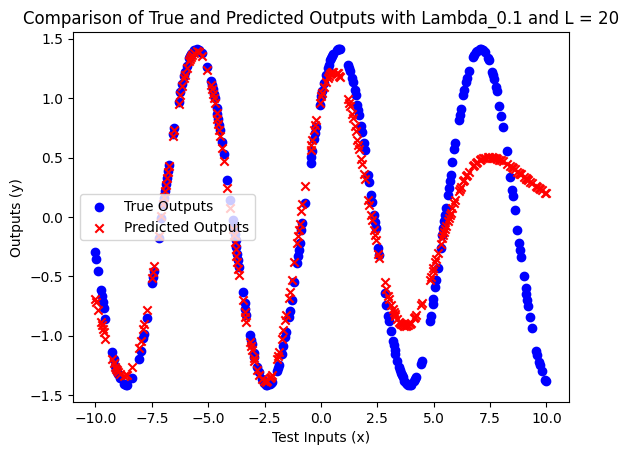

In [77]:
# Plotting the result
plt.scatter(test_x, test_y, color='blue', label='True Outputs', marker='o')
plt.scatter(test_x, landmark_predicted_y, color='red', label='Predicted Outputs', marker='x')
plt.xlabel('Test Inputs (x)')
plt.ylabel('Outputs (y)')
plt.title('Comparison of True and Predicted Outputs with Lambda_0.1 and L = 20')
plt.legend()
plt.show()

RMSE_Score with L 2 = 0.9801127942233553
RMSE_Score with L 5 = 0.9217137628255894
RMSE_Score with L 20 = 0.1409376491650196
RMSE_Score with L 50 = 0.0872445320079938
RMSE_Score with L 100 = 0.07354164677663957


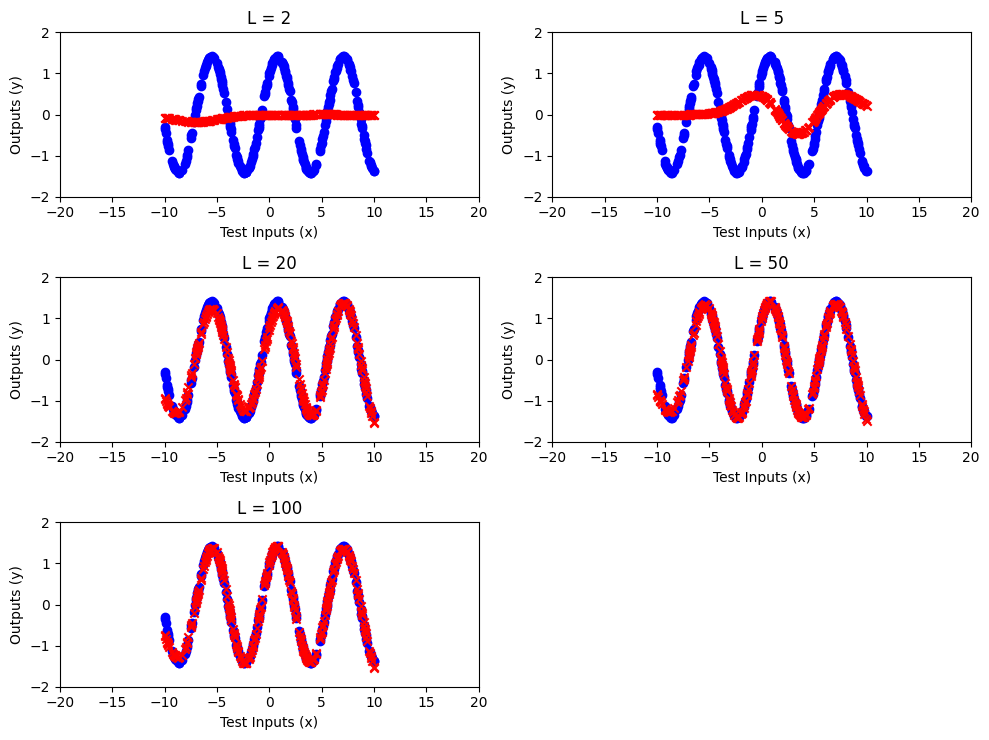

In [78]:
# Computing for different L
L_values = [2,5,20,50,100]
lambda_value = 0.1

plt.figure(figsize=(10, 7.5))
for i,l_value in enumerate(L_values):

    # Computing Landmarks
    landmarks = compute_landmarks(train_x,l_value)

    # Computing new train feature vector
    train_feature_matrix = np.array(compute_new_feature(train_x,landmarks))

    

    # Computing Weight Matrix
    weight_matrix = compute_weight_vector(train_feature_matrix,train_y,lambda_value)
    # print(weight_matrix.shape)

    # Computing new feature vector for test_x data
    test_x_landmarks = np.array(compute_new_feature(test_x,landmarks))
    # print(test_x_landmarks.shape)

    # Landmark basedr Ridge Prediction
    landmark_predicted_y = np.array(landmark_ridge_prediction(weight_matrix,test_x_landmarks))
    # print(landmark_predicted_y.shape)

    # Computing RMSE
    rmse_score = calculate_rmse(test_y,landmark_predicted_y)
    print("RMSE_Score with L {} = {}".format(l_value,rmse_score))

    # 
    
    plt.subplot(3,2,i+1)
    plt.xlim(-20, 20)
    plt.ylim(-2, 2)
    plt.scatter(test_x, test_y, color='blue', label='True Outputs', marker='o')
    plt.scatter(test_x, landmark_predicted_y, color='red', label='Predicted Outputs', marker='x')
    plt.xlabel('Test Inputs (x)')
    plt.ylabel('Outputs (y)')
    plt.title(f'L = {l_value}')
plt.legend()
plt.tight_layout()
plt.show()
    
    